# Stratification Example

##### Keywords: variance reduction, stratification, 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Finished Setup")

Finished Setup


The key idea in stratification is to split the domain on which we wish to calculate an expectation or integral into strata. Then, on each of these strata, we calculate the sub-integral as an expectation separately, using whatever method is appropriate for the stratum, and which gives us the lowest variance. These expectations are then combined together to get the final value.

In other words we can achieve better sampling in needed regions by going away from a one size fits all sampling scheme. One way to think about it is that regions with higher variability might need more samples, while not-so-varying regions could make do with less.

The diagram below illustrates this a bit. One could stratify by staying on the given grid, but the blue and yellow strata we have chosen might be better.

![](images/strat.png)



Now, instead of taking $N$ samples, we break the interval into $M$ _strata_ and take $n_j$ samples for each
strata $j$, such that $N=\sum_j n_j$.

Defining:

$$\hat{\mu_j} = \frac{1}{n_j} \sum_{x_ij \sim f_j} h(x_ij).$$

We can then define the stratified estimator of the overall expectation

$$\hat{\mu_s} = \sum_j p_j \hat{\mu_j}.$$

which is an unbiased estimator of $\mu$. 

$$Var_R[\hat{\mu_s}] =  Var_R[\sum_j p_j \hat{\mu_j}] =  \sum_j p_j^2 Var_R[\hat{\mu_j}] =  \sum_j p_j^2 \frac{\sigma_j^2}{n_j} $$

where

$$\sigma_j^2 = \int_{D_j}  (h(x) - \mu_j)^2 f_j(x) dx $$

is the "population variance" of $h(x)$ with respect to pdf $f_j(x)$ in region of support $D_j$.

## Example

For a  one-dimensional application we take $ x/(x^2+1)$ and integrate from $[0,1]$.
We break $[0,10]$ into $M$ strata and for each stratum, take $N/M$ samples
with uniform probability distribution. Compute the average within each 
stratum, and then calculate the overall average. 

See http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf

[ 0.14107667  0.03162259  0.02940649  0.01900292  0.01271643  0.00895477
  0.00630853  0.00543713  0.00386624  0.00336021] [5390 1209 1124  726  486  343  242  208  148  129]
0.0125753143692 0.00513272712475 0.00266425558846


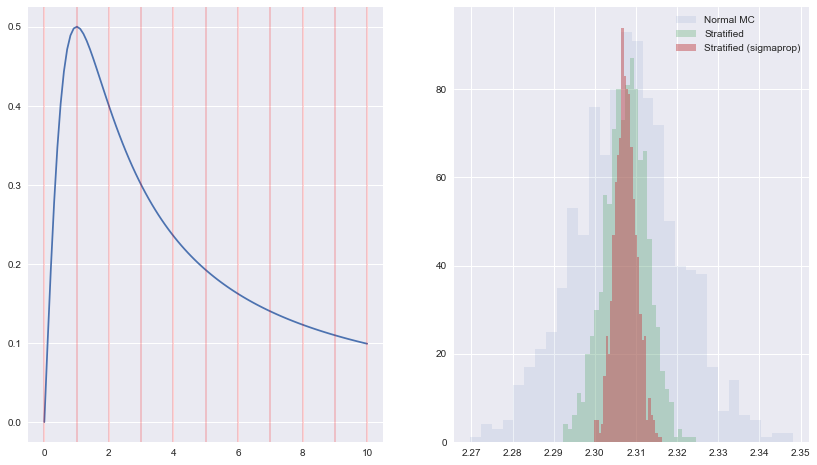

In [13]:
plt.figure(figsize=[14,8])
Y = lambda x: x/(x**2+1.0);
intY = lambda x: np.log(x**2 + 1.0)/2.0;



N = 10000
Nrep = 1000
Ntry = 1000
Ns = 10   # number of strata 

xmin=0
xmax =10
step = (xmax - xmin)/Ns
# analytic solution 
Ic = intY(xmax)-intY(xmin)


Imc = np.zeros(Nrep)
Is = np.zeros(Nrep)
Is2 = np.zeros(Nrep)

## Ploting the original functions 
plt.subplot(1,2,1)
x = np.linspace(0,10,100)
plt.plot(x, Y(x), label=u'$x/(x**2+1)$')
for j in range(Ns+1):
    plt.axvline(xmin + j*step, 0, 1, color='r', alpha=0.2)
    
sigmas = np.zeros(Ns)
Utry = np.random.uniform(low=xmin, high=xmax, size=Ntry)
Ytry = Y(Utry)
Umin = 0 
Umax = step
for reg in np.arange(0,Ns):
    localmask = (Utry >= Umin) & (Utry < Umax)
    sigmas[reg] = np.std(Ytry[localmask])
    Umin = Umin + step
    Umax = Umin + step
nums = np.ceil(N*sigmas/np.sum(sigmas)).astype(int)
print(sigmas, nums)
    
for k in np.arange(0,Nrep):
    # First lets do it with mean MC method 
    U = np.random.uniform(low=xmin, high=xmax, size=N)
    Imc[k] = (xmax-xmin)* np.mean(Y(U))

    #stratified it in Ns regions
    Umin = 0 
    Umax = step
    Ii = 0
    I2i = 0
    for reg in np.arange(0,Ns):
        x = np.random.uniform(low=Umin, high=Umax, size=N//Ns);
        Ii = Ii + (Umax-Umin)*np.mean(Y(x))
        x2 = np.random.uniform(low=Umin, high=Umax, size=nums[reg]);
        I2i = I2i + (Umax-Umin)*np.mean(Y(x2))
        Umin = Umin + step
        Umax = Umin + step


    Is[k] = Ii
    Is2[k] = I2i

plt.subplot(1,2,2)
plt.hist(Imc,30, histtype='stepfilled', label=u'Normal MC', alpha=0.1)
plt.hist(Is, 30, histtype='stepfilled', label=u'Stratified', alpha=0.3)
plt.hist(Is2, 30, histtype='stepfilled', label=u'Stratified (sigmaprop)', alpha=0.5)


plt.legend()

print(np.std(Imc), np.std(Is), np.std(Is2))